<a href="https://colab.research.google.com/github/MatheusPiassiC/redes_neurais/blob/main/cnn_exerc_01_cat_or_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso: Redes Neurais Convolucionais

Prof. [Denilson Alves Pereira](https://sites.google.com/ufla.br/denilsonpereira) <br>
Departamento de Ciência da Computação (DCC) <br>
Instituto de Ciências Exatas e Tecnológicas (ICET) <br>
Universidade Federal de Lavras (UFLA)

# Atividade Prática 01

**Instruções:**
1. Siga os passos indicados em cada célula abaixo para completar a atividade.
2. Você deve inserir código somente entre as linhas marcadas com **INICIE O CÓDIGO AQUI** e **TERMINE O CÓDIGO AQUI**. Há uma indicação de quantas linhas de código são necessárias.
3. Em alguns pontos, confira o resultado esperado conforme marcado com **SAÍDA ESPERADA**.

**Tempo estimado para execução**: 1,5 horas

Versão: Julho, 2021

## O Problema a ser Resolvido

O objetivo da atividade é elaborar uma rede neural convolucional para predizer se o animal de uma imagem é um gato ou um cachorro. <br>

Será usado um dataset contendo 8.000 imagens para treinamento e 4.000 para teste, sendo a metade delas de gatos e a outra metade, de cachorros. As imagens têm tamanhos diversos e estão no formato RGB.

Você vai praticar as seguintes habilidades:
- Ler arquivos de imagens e convertê-los para vetores de pixels
- Utilizar um gerador de dados aumentados para expandir o conjunto de imagens para treinamento da rede
- Configurar uma rede neural com camadas de convolução, pooling e densa para um problema de classificação multiclasse de imagem. Embora só existam duas classes, a saída será configurada para predizer "cat" se a imagem é de um gato ou "dog" se a imagem é de um cachorro.

## Pacotes

In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


In [ ]:
import numpy as np # scientific computing
import tensorflow as tf  #  numerical computation using data flow graphs
from tensorflow import keras  # deep learning
from keras_preprocessing.image import ImageDataGenerator, load_img  # generate batches of tensor image data with real-time data augmentation
import pandas as pd # structured data
import matplotlib.pyplot as plt # scientific plotting library
import random  # pseudo-random number generators
import os  # for accessing directory structure

from google.colab import drive # pequena alteração feita para utilizar o drive como diretório
drive.mount('/content/drive')

Mounted at /content/drive


## Inicializações

In [ ]:
IMAGE_WIDTH = 128  # largura da imagem
IMAGE_HEIGHT = 128 # altura da imagem
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT) # tamanho da imagem
IMAGE_CHANNELS = 3  # número de canais da imagem
DIR_TRAIN = "/content/drive/MyDrive/Colab Notebooks/notebooks-atividades-praticas-cnn/dataset-cats-and-dogs/training_set/"  # diretório contendo dados de treinamento
DIR_TEST = "/content/drive/MyDrive/Colab Notebooks/notebooks-atividades-praticas-cnn/dataset-cats-and-dogs/test_set/"  # diretório contendo dados de teste

## Pré-Processamento dos Dados de Treino e de Teste

Fonte: https://www.kaggle.com/d4rklucif3r/cat-and-dogs

### Treino

In [ ]:
# Read the images from the training directory and generates a pandas structure with the name of each file and the class of the image (cat or dog)
filenames = os.listdir(DIR_TRAIN)
categories = []
for filename in filenames:
    categories.append(filename.split('.')[0]) # category = file name

df_train = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df_train.head()

,filename,category
0,dog.3712.jpg,dog
1,dog.3659.jpg,dog
2,dog.3718.jpg,dog
3,dog.3660.jpg,dog
4,dog.3666.jpg,dog


In [ ]:
df_train.tail()

,filename,category
7995,cat.1870.jpg,cat
7996,cat.1894.jpg,cat
7997,cat.1873.jpg,cat
7998,cat.1949.jpg,cat
7999,cat.1913.jpg,cat


<Axes: xlabel='category'>

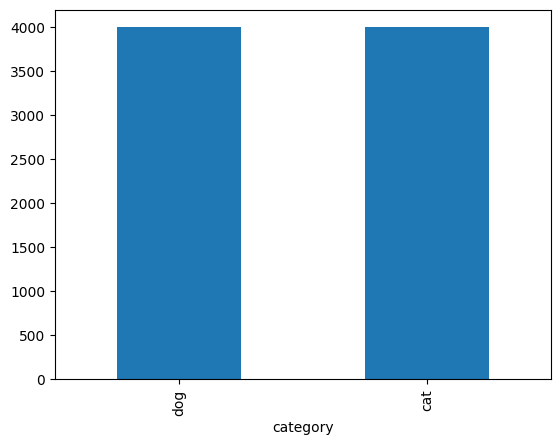

In [ ]:
# number of cats and dogs
df_train['category'].value_counts().plot.bar()

#### Exibe uma amostra

Text(0.5, 1.0, 'dog.2330.jpg')

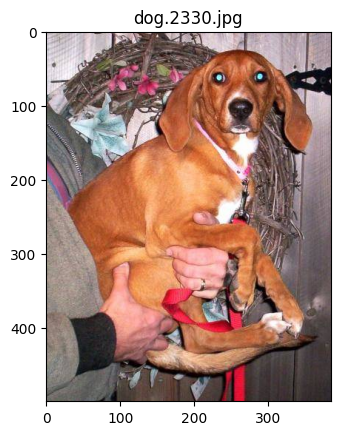

In [ ]:
# Randomly chooses a file and displays its image
sample = random.choice(filenames)
image = load_img(DIR_TRAIN+sample)
plt.imshow(image)
plt.title(sample)

In [ ]:
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(385, 500)


### Representação de imagens RGB

![imagem-rgb.png](attachment:imagem-rgb.png)

Em imagens coloridas, o padrão RGB (Red, Green, Blue) representa cada pixel como um vetor de três números para os três canais das cores primárias vermelho, verde e azul. Cada número varia de 0 a 255, representando a intensidade da cor correspondente. O três valores combinados formam a cor do pixel. Por exemplo, a cor violeta pode ser representada como 128, 0, 128, uma mistura de intensidade moderada de vermelho e azul, sem o verde.

Já em imagens em escala de cinza (*grayscale*), cada pixel é representado com um único número (entre 0 e 255), o qual determina o quão preto é o pixel (0 é preto e 255 é branco brilhante).

In [ ]:
# convert image to numpy array
data = np.asarray(image)
# summarize shape
print(data.shape)

(500, 385, 3)


### Teste

In [ ]:
# Read the images from the test directory and generates a pandas structure with the name of each file and the class of the image (cat or dog)
filenames = os.listdir(DIR_TEST)
categories = []
for filename in filenames:
    categories.append(filename.split('.')[0]) # category = file name

df_test = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df_test.head()

,filename,category
0,dog.4049.jpg,dog
1,dog.4025.jpg,dog
2,dog.4011.jpg,dog
3,cat.4991.jpg,cat
4,cat.4982.jpg,cat


In [ ]:
df_test.tail()

,filename,category
1995,dog.4040.jpg,dog
1996,dog.4019.jpg,dog
1997,dog.4001.jpg,dog
1998,dog.4051.jpg,dog
1999,dog.4014.jpg,dog


<Axes: xlabel='category'>

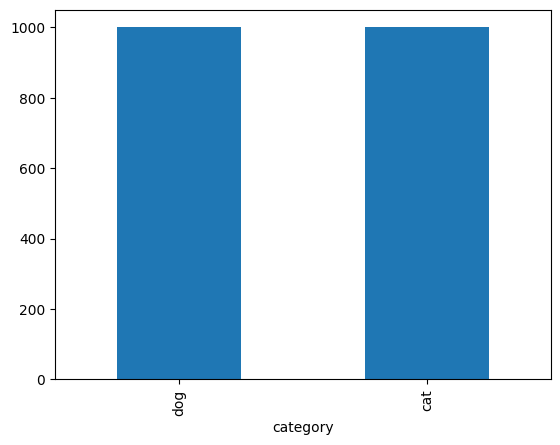

In [ ]:
# number of cats and dogs
df_test['category'].value_counts().plot.bar()

#### Sample images

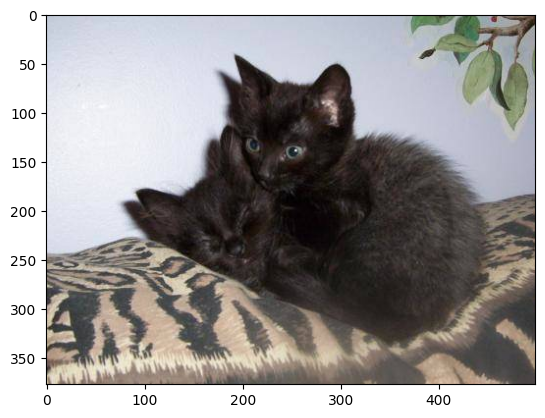

In [ ]:
# Randomly chooses a file and displays its image
sample = random.choice(filenames)
image = load_img(DIR_TEST+sample)
plt.imshow(image)

### Data Augmentation

*Data Augmentation* (aumento de dados) é uma técnica usada para expandir artificialmente o conjunto de dados de treinamento. Ela ajuda a evitar o problema de *overfitting*, que faz com que o modelo de treinamento fique muito ajustado aos dados usados para o treinamento, e não gera um bom desempenho em outros conjuntos de dados.

No caso das imagens de gatos e cachorros, a ideia é alterar os dados de treino com pequenas transformações nas imagens, de forma a reproduzir as variações que ocorrem quando alguém tira uma foto. Por exemplo, centralização, diferentes escalas (gatos/cachorros grandes e pequenos), a imagem está rotacionada etc. Além disso, o dataset contém imagens de tamanhos diferentes, e precisam ser padronizadas para dar entrada na rede neural.

As abordagens para *data augmentation* alteram os dados de treino de forma a mudar a representação vetorial, mas mantendo o mesmo rótulo de classe. Algumas transformações populares são: grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, shift, brightness, and zoom.

Fazendo algumas dessas transformações nos dados de treino, é possível multiplicar o número de exemplos de treino, de forma a criar um modelo mais robusto.

Tutorial para configurar *data augmentation* de imagens em Keras: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

### Generador de Treino

Documentação: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Este exemplo foi adaptado de https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification. <br>

In [ ]:
batch_size = 15  # number of images to be generated
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

# Takes the dataframe and the path to a directory and generates batches.
# The generated batches contain augmented/normalized data.
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    DIR_TRAIN,
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 8000 validated image filenames belonging to 2 classes.


### Generador de Teste

Um gerador de dados pode também ser usado para especificar o dataset de validação e o dataset de teste. Normalmente, uma instância separada de ImageDataGenerator é criada para que se possa configurar a mesma escala de pixels que aquela usada na instância ImageDataGenerator do dataset de treinamento, mas ela não usará *data augmentation*. Isso ocorre porque *data augmentation* é somente usada como uma técnica para expandir artificialmente o dataset de treinamento, para se melhorar o desempenho de um dataset menor.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_test,
    DIR_TEST,
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 2000 validated image filenames belonging to 2 classes.


### Exemplo das Imagens Aumentadas

In [ ]:
df_example = df_train.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    df_example,
    DIR_TRAIN,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


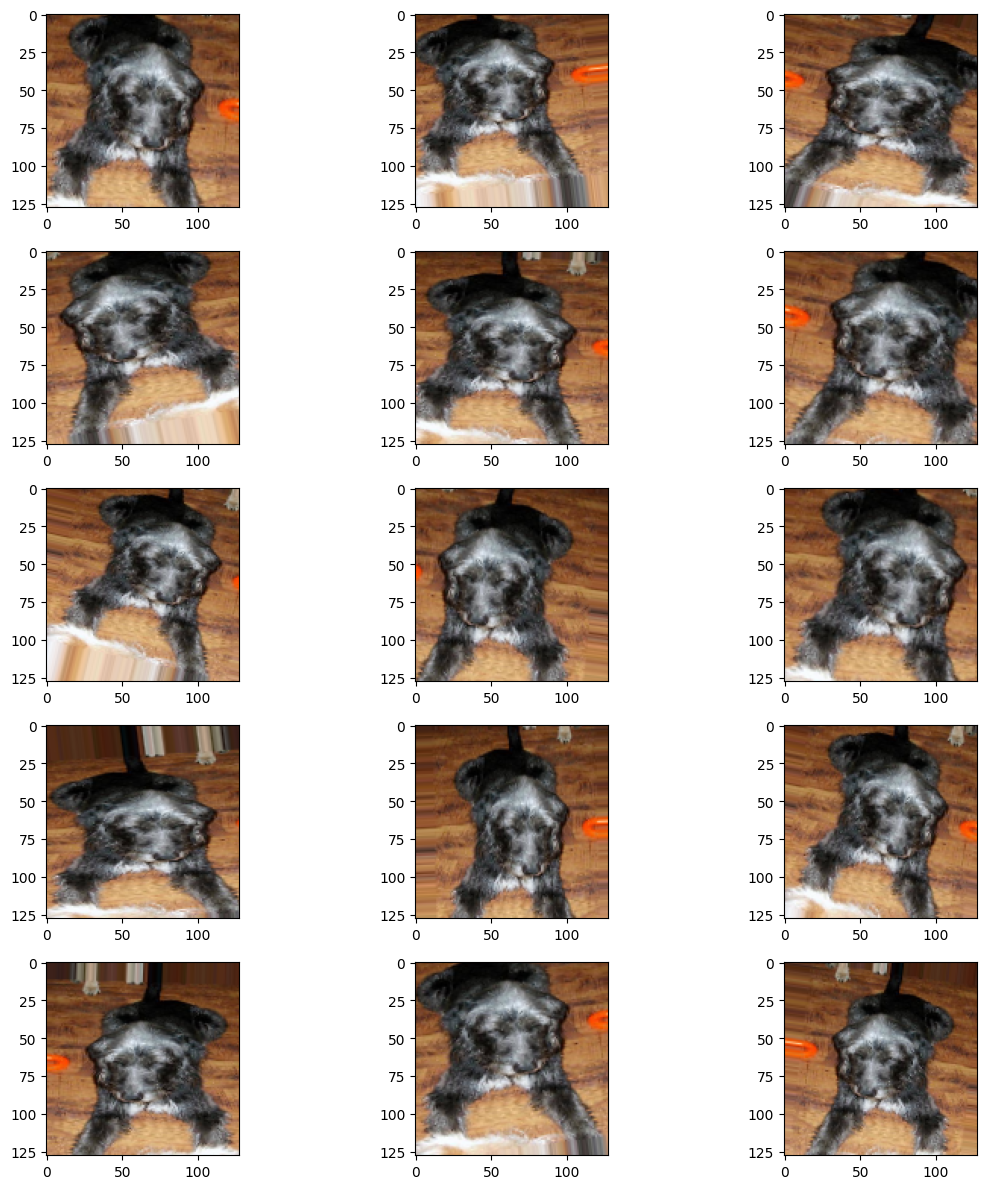

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## Definição do Modelo

Crie um modelo em Keras com a configuração mostrada na figura

![configuracao-cnn.png](attachment:configuracao-cnn.png)

Documentação: <br>
Keras: https://keras.io/ <br>
Classe *Model*: https://keras.io/api/models/model/ <br>
Classe *Sequential*:https://keras.io/api/models/sequential/#sequential-class <br>
Camadas: https://www.tensorflow.org/api_docs/python/tf/keras/layers <br>
Funções de ativação disponíveis: https://keras.io/api/layers/activations/

In [ ]:
### INICIE O CÓDIGO AQUI ### (~11 linhas de código)
inputs = keras.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))

x = keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1,1), padding="valid", activation='relu')(inputs)
x = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2))(x)
x = keras.layers.Conv2D(64, kernel_size=(5, 5), strides=(1,1), padding="valid", activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2))(x)
x = keras.layers.Conv2D(128, kernel_size=(5, 5), strides=(1,1), padding="valid", activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dense(256, activation="relu")(x)
outputs = keras.layers.Dense(2, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

### TERMINE O CÓDIGO AQUI ###

In [ ]:
# Prints a summary of the network, showing its architecture and parameters.
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,828,162 (37.49 MB)

 Trainable params: 9,828,162 (37.49 MB)

 Non-trainable params: 0 (0.00 B)

**SAÍDA ESPERADA**: <br>
Confira a configuração da rede e o total de parâmetros = 9,828,162

---

## Compilação do Modelo

Compile o model usando os seguintes parâmetros:
- Função de perda: categorical_crossentropy
- Otimizador: rmsprop
- Métricas: accuracy

Dica 1: use a função *compile*: https://keras.io/api/models/model_training_apis/ <br>
Dica 2: relação de funções de perda: https://www.tensorflow.org/api_docs/python/tf/keras/losses <br>
Dica 3: relação de otimizadores: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers <br>
Dica 4: relação de métricas: https://keras.io/api/metrics/

In [ ]:
### INICIE O CÓDIGO AQUI ### (1 linha de código)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
### TERMINE O CÓDIGO AQUI ###

## Treinamento do Modelo

Ajusta o modelo aos dados de treinamento.
Devem ser fornecidos os dados de treinamento e o número de épocas (iterações). Uma época é composta por uma única passagem por todos os exemplos do conjunto de treino.

Efetue o treinamento do modelo usando 3 épocas com os dados aumentados do gerador de treino *train_generator*.

Documentação: https://keras.io/api/models/model_training_apis/

In [ ]:
### INICIE O CÓDIGO AQUI ### (1 linha de código)
history = model.fit(train_generator, epochs=3)
### TERMINE O CÓDIGO AQUI ###

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
534/534 ━━━━━━━━━━━━━━━━━━━━ 285s 504ms/step - accuracy: 0.5131 - loss: 0.7402
Epoch 2/3
534/534 ━━━━━━━━━━━━━━━━━━━━ 69s 129ms/step - accuracy: 0.5648 - loss: 0.6936
Epoch 3/3
534/534 ━━━━━━━━━━━━━━━━━━━━ 70s 131ms/step - accuracy: 0.6196 - loss: 0.6550


**SAÍDA ESPERADA**: <br>
Na época 3, tem-se o seguinte resultado (aproximado): <br>

loss: 0.6577 - accuracy: 0.6292

---

## Visualização do Desempenho do Modelo

Exibe gráficos de performance do modelo treinado.

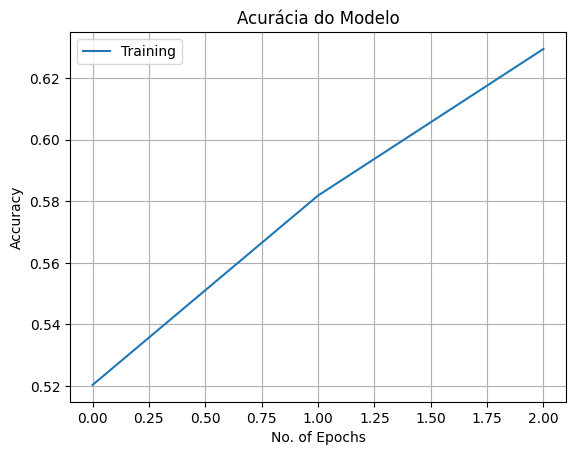

In [ ]:
# plot the accuracy over the training set
plt.plot(history.history['accuracy'])
plt.title('Acurácia do Modelo')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training'])
plt.grid()
plt.show()

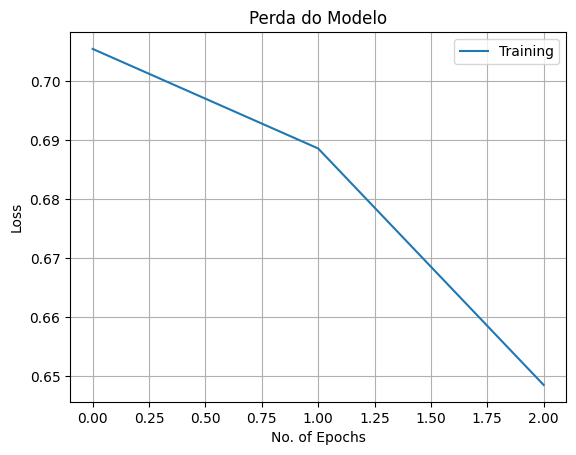

In [ ]:
# plot the loss over the training set
plt.plot(history.history['loss'])
plt.title('Perda do Modelo')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend(['Training'])
plt.grid()
plt.show()

## Gravação do Modelo

Salve o modelo treinado em um arquivo para posterior reutilização.

Documentação: <br>
https://www.tensorflow.org/guide/keras/save_and_serialize <br>
https://keras.io/api/models/model_saving_apis/

In [ ]:
### INICIE O CÓDIGO AQUI ### (1 linha de código)
model.save('modelo-exercicio-cnn01.keras')
### TERMINE O CÓDIGO AQUI ###

## Avaliação do Modelo

Avalie o desempenho da rede no conjunto de teste usando o gerador de dados aumentados *test_generator*.

Documentação: https://keras.io/api/models/model_training_apis/

In [ ]:
### INICIE O CÓDIGO AQUI ### (1 linha de código)
loss, acc = model.evaluate(test_generator)
### TERMINE O CÓDIGO AQUI ###
print("Loss: %.4f" % loss, "\nAccuracy: %.4f" % acc)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


134/134 ━━━━━━━━━━━━━━━━━━━━ 1330s 10s/step - accuracy: 0.6673 - loss: 0.6170
Loss: 0.6100 
Accuracy: 0.6710


**SAÍDA ESPERADA**: <br>
Valores aproximados: <br>
- Loss: 0.6518 <br>
- Accuracy: 0.6785

---

## Predição

Apresente a predição do conjunto de teste usando o gerador de dados aumentados *test_generator*.

Documentação: <br>
Função *predict*: https://keras.io/api/models/model_training_apis/ <br>
Função *argmax*: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html

Na classificação multiclasse, *model.predict* retorna um vetor de probabilidades para cada classe. A função *argmax* retorna o índice do vetor com a maior probabilidade, neste caso, 0 para gato e 1 para cachorro.

In [ ]:
### INICIE O CÓDIGO AQUI ### (1 linha de código)
predictions = model.predict(test_generator)
### TERMINE O CÓDIGO AQUI ###
preds = [np.argmax(x, axis=-1) for x in predictions]
print("Predictions: ", ["cat" if x == 0 else "dog" for x in preds[:30]]) # print the first 30 predictions
print("\nCorrect:     ", [x for x in df_test['category'][:30]])

134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step
Predictions:  ['cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat']

Correct:      ['dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog']


## Desafio

Modifique a configuração da sua rede e/ou os parâmetros dos métodos com o objetivo de melhorar os resultados das métricas no conjunto de teste. Experimente várias opções.

*Sugestão* - Experimente adicionar as seguintes camadas:
- BatchNormalization após cada camada de convolução: x = keras.layers.BatchNormalization()(x)
- Dropout após cada camada de pooling: x = keras.layers.Dropout(0.25)(x)
- BatchNormalization e Dropout após as duas primeiras camadas densas: x = keras.layers.BatchNormalization()(x) e x = keras.layers.Dropout(0.50)(x)

Adicione abaixo a nova sequência de código que alcançou o melhor resultado.

In [ ]:
### INICIE O CÓDIGO AQUI ### (várias linhas de código / várias células)
inputs2 = keras.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))

x2 = keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding="valid", activation='relu')(inputs2)
x2 = keras.layers.BatchNormalization()(x2)
x2 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2))(x2)
x2 = keras.layers.Dropout(0.25)(x2)

x2 = keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1), padding="valid", activation='relu')(x2)
x2 = keras.layers.BatchNormalization()(x2)
x2 = keras.layers.MaxPool2D(pool_size=(2, 3), strides=(2,2))(x2)
x2 = keras.layers.Dropout(0.25)(x2)

x2 = keras.layers.Conv2D(128, kernel_size=(3, 3), strides=(1,1), padding="valid", activation='relu')(x2)
x2 = keras.layers.BatchNormalization()(x2)
x2 = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2,2))(x2)
x2 = keras.layers.Dropout(0.25)(x2)

x2 = keras.layers.Flatten()(x2)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2 = keras.layers.BatchNormalization()(x2)
x2 = keras.layers.Dropout(0.25)(x2)
x2 = keras.layers.Dense(128, activation="relu")(x2)
x2 = keras.layers.BatchNormalization()(x2)
x2 = keras.layers.Dropout(0.25)(x2)
outputs2 = keras.layers.Dense(2, activation='softmax')(x2)
model2 = keras.Model(inputs=inputs2, outputs=outputs2)
### TERMINE O CÓDIGO AQUI ###

In [ ]:
model2.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history2 = model2.fit(train_generator, epochs=5)

Epoch 1/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 67s 126ms/step - accuracy: 0.7231 - loss: 0.5478
Epoch 2/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 68s 127ms/step - accuracy: 0.7496 - loss: 0.5062
Epoch 3/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 67s 126ms/step - accuracy: 0.7640 - loss: 0.4804
Epoch 4/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 67s 125ms/step - accuracy: 0.7812 - loss: 0.4691
Epoch 5/5
534/534 ━━━━━━━━━━━━━━━━━━━━ 69s 129ms/step - accuracy: 0.7887 - loss: 0.4487


In [ ]:
loss2, acc2 = model2.evaluate(test_generator)
print("Loss: %.4f" % loss2, "\nAccuracy: %.4f" % acc2)

134/134 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.6948 - loss: 0.7500
Loss: 0.7023 
Accuracy: 0.7120


# Fim

Parabéns! Você efetuou todos os passos para criar uma rede neural convolucional com várias camadas para um problema de classificação de imagens.

-------------------------------------------